In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## What are the different types of Missing Data?
####  Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.



In [2]:
df= pd.read_csv(r"https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
#To show all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

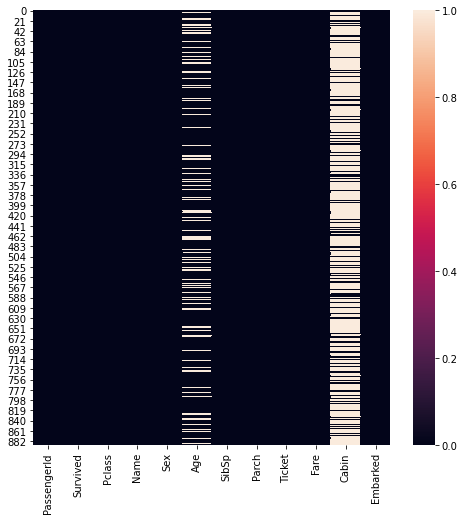

In [8]:
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

### %age of null values

In [9]:
df.shape[0]

891

In [10]:
null_var = df.isnull().sum()/df.shape[0] *100
null_var

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
# We should drop columns where more than 20% values are missing, depending upon the situation.
drop_columns  = null_var[null_var >20].keys()
drop_columns

Index(['Cabin'], dtype='object')

#### As Cabin and Age columns hab some relationship, so we are not going to drop it.
#### Missing Data Not At Random(MNAR): Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [12]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [13]:
#Another way to find out the %age
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

##find the percentage of null values
df['cabin_null'].mean()

0.7710437710437711

In [14]:
df['cabin_null']=np.where(df['Cabin'].isna(),1,0)
#nan values will be replaced by 1 and values which are not nan will replaced by 0.
df.cabin_null.head()

0    1
1    0
2    1
3    0
4    1
Name: cabin_null, dtype: int32

In [15]:
# %age of survived and not survived.
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

### Missing At Random(MAR)


Men---hide their salary

Women---hide their age

### All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

## 1.Mean/ Median /Mode imputation

When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables


In [16]:
df=pd.read_csv(r"https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [17]:
## Lets go and see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [18]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [19]:
median=df.Age.median()
median

28.0

In [20]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [21]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


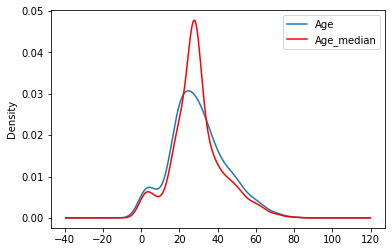

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [23]:
df.select_dtypes(include=['int64','float64']).columns

Index(['Survived', 'Age', 'Fare', 'Age_median'], dtype='object')

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


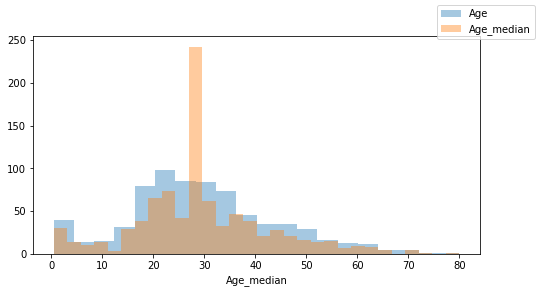

In [24]:
fig = plt.figure(figsize=(8,4))
sns.distplot(df['Age'], label = 'Age', kde= False)
sns.distplot(df['Age_median'],label = 'Age_median',kde= False)
fig.legend(labels=['Age','Age_median'])
plt.show()

### Advantages And Disadvantages of Mean/Median Imputation
#### Advantages

1.Easy to implement(Robust to outliers

2.Faster way to obtain the complete dataset 
#### Disadvantages

3.Change or Distortion in the original variance

4.Impacts Correlation

## 2.Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR).


In [25]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [26]:
df.drop('Age_median',axis = 1, inplace = True)

In [27]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
df.isna().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [29]:
df.isna().mean() #%age

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

#### randomly takes sample from values excluding nan and filling it into the empty columns.

In [30]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0) 

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
595    36.00
637    31.00
54     65.00
456    65.00
110    47.00
287    22.00
315    26.00
691     4.00
811    39.00
861    21.00
15     55.00
239    33.00
644     0.75
394    24.00
795    39.00
131    20.00
346    40.00
9      14.00
477    29.00
606    30.00
469     0.75
325    36.00
72     21.00
724    27.00
40     40.00
382    32.00
824     2.00
682    20.00
591    52.00
614    35.00
197    42.00
1      38.00
512    36.00
640    20.00
830    15.00
225    22.00
391    21.00
621    42.00
102    21.00
756    28.00
777     5.00
261     3.00
655    24.00
590    35.00
403    28.00
822    38.00
345    24.00
666    25.00
218    32.00
772    57.00
729    25.00
446    13.00
442    25.00
570    62.00
35     42.00
332    38.00
631    51.00
312    26.00
441    20.00
504    16.00
251    29.00
609    40.00
812    35.00
297     2.00
97     23.00
212    22.00
390    36.00
417    18.00
558    39.00
195    58.00
681    27.00
677    18.00

In [31]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [32]:
median=df.Age.median()

In [33]:
median

28.0

In [34]:
impute_nan(df,"Age",median)

In [35]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


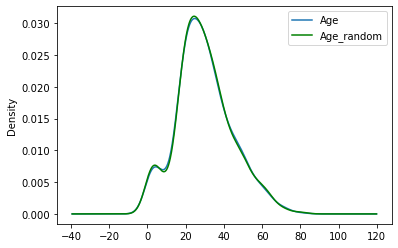

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
#df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


#### Advantages

1.Easy To implement

2.There is less distortion in variance

#### Disadvantage

1.Every situation randomness wont work




## 3.Capturing NAN values with a new feature

It works well if the data are not missing completely at random


In [37]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [38]:
df.drop(['Age_median','Age_random'],axis = 1, inplace = True)

In [39]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [40]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [41]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [42]:
df.Age.median()

28.0

In [43]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [44]:
df.head(10) #model will learn something with the help of additional feature.

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0



#### Advantages
1.Easy to implement

2.Captures the importance of missing values

#### Disadvantages
1.Creating Additional Features(Curse of Dimensionality)



## 4. End of Distribution imputation

In [45]:
df=pd.read_csv(r"https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

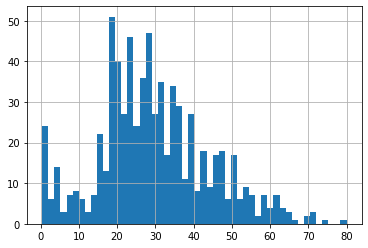

In [46]:
df.Age.hist(bins=50)

In [47]:
extreme=df.Age.mean()+3*df.Age.std()

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

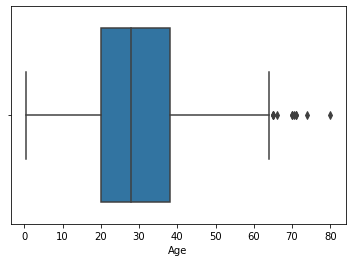

In [48]:
sns.boxplot('Age',data=df)

In [49]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [50]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [51]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

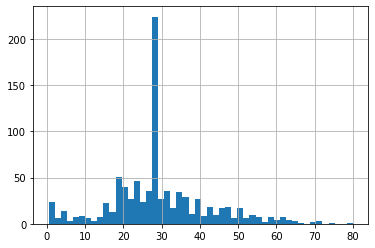

In [52]:
df['Age'].hist(bins=50)

<AxesSubplot:>

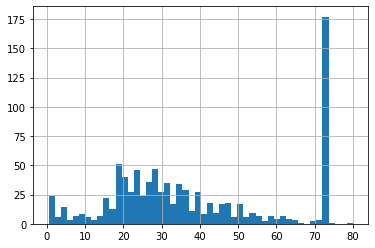

In [53]:
df['Age_end_distribution'].hist(bins=50)

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

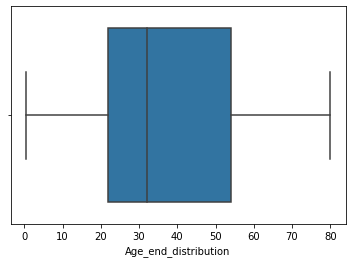

In [54]:
sns.boxplot('Age_end_distribution',data=df)

### Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one

### Disadvantages
1. Distorts the orignal distribution of the variable
2. If the number of NA is big, it will mask true outliers in the distribution

## 5. Arbitrary imputation
This technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [55]:
df=pd.read_csv(r"https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv",usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

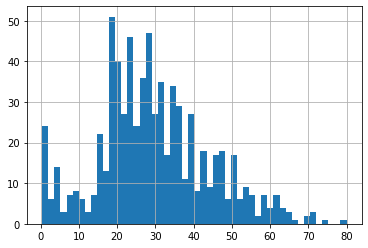

In [58]:
df['Age'].hist(bins=50)

In [59]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)


#### Advantages
Easy to implement

Captures the importance of missingess if there is one

#### Disadvantages
Distorts the original distribution of the variable
If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
    
Hard to decide which value to use



### How To Handle Categorical Missing Values

## 6.Frequent Categories Imputation

In [67]:
df = pd.read_csv(r'C:\\Users\\Akshat\\Downloads\\loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [68]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [69]:
df.shape

(1460, 4)

In [70]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [74]:
df.isnull().mean().sort_values(ascending = True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#### Compute the frequency with every feature

<AxesSubplot:>

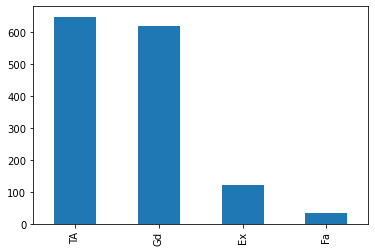

In [75]:
df['BsmtQual'].value_counts().plot.bar()

In [77]:
df.groupby(['BsmtQual'])['BsmtQual'].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

<AxesSubplot:xlabel='BsmtQual'>

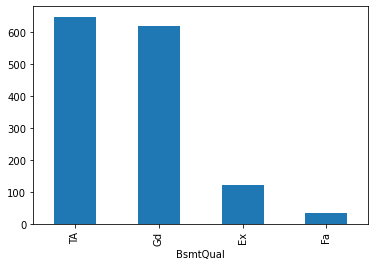

In [76]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

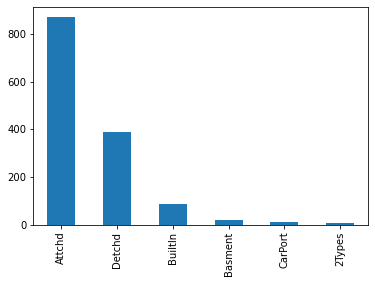

In [78]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

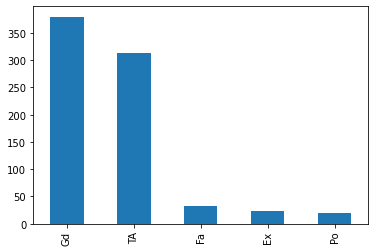

In [79]:
df['FireplaceQu'].value_counts().plot.bar()

In [81]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [83]:
df['GarageType'].mode()[0]

'Attchd'

In [84]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].mode()[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [85]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [88]:
df.isna().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

### Advantages
Easy To implement

Fater way to implement 

### Disadvantages
Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's
   
It distorts the relation of the most frequent label

#### if 50% or more data is missing, we shouldn't implement it



# --------------XXXXXXXX-------------------------

### Repeat:Adding a variable to capture NAN[New Dataset] 

In [95]:
df = pd.read_csv(r'C:\\Users\\Akshat\\Downloads\\loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [96]:
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [97]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [99]:
frequent=df['BsmtQual'].mode()[0]

In [100]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [101]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [102]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [103]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


#### Suppose if you have more frequent categories, we just replace NAN with a new category
##### Most used category rn

In [125]:
df = pd.read_csv(r'C:\\Users\\Akshat\\Downloads\\loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [126]:
def impute_nan(df,variable):
    df[variable+" new_var"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [127]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [128]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual new_var,FireplaceQu new_var,GarageType new_var
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [129]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)
df.head()

,SalePrice,BsmtQual new_var,FireplaceQu new_var,GarageType new_var
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


#### Remaining
#### knn imputator

# Handling Categorical Feature
## One Hot Encoding

In [131]:
df=pd.read_csv(r"https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv",usecols=['Sex'])
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [133]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [132]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [134]:
df=pd.read_csv(r"https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv",usecols=['Embarked'])
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [135]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [136]:
df.dropna(inplace=True)

In [137]:
pd.get_dummies(df,drop_first=False).head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [138]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


### Disadvantage
#### Onehotencoding will create too many features

#### Next - Topic : Onehotencoding with many categories in a feature

In [142]:
df = pd.read_csv(r'https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/mercedes.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [143]:
df['X0'].value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
m      34
ai     34
e      32
ba     27
at     25
a      21
ax     19
i      18
aq     18
am     18
u      17
l      16
aw     16
ad     14
au     11
k      11
b      11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
g       1
ac      1
ab      1
Name: X0, dtype: int64

In [144]:
df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [145]:
len(df['X0'].unique())

47

In [146]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [147]:
df.X1.value_counts()

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
q       3
ab      3
Name: X1, dtype: int64

In [148]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [150]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10

Index(['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o'], dtype='object')

In [152]:
lst_10=list(lst_10)
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

## Here we will take top 10 features only!!

In [ ]:
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [154]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [156]:
lst_10.append('X1')

In [157]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1,X1
0,0,0,0,0,1,0,0,0,0,0,v,v
1,0,0,0,0,0,0,0,0,0,0,t,t
2,0,0,0,0,0,0,0,0,0,0,w,w
3,0,0,0,0,0,0,0,0,0,0,t,t
4,0,0,0,0,1,0,0,0,0,0,v,v
5,0,0,1,0,0,0,0,0,0,0,b,b
6,0,0,0,0,0,1,0,0,0,0,r,r
7,0,0,0,1,0,0,0,0,0,0,l,l
8,0,1,0,0,0,0,0,0,0,0,s,s
9,0,0,1,0,0,0,0,0,0,0,b,b


## Remaining Encoding Techniques 
1. Odinal no. encoding
2. count frequency encoding
3. target guided encoding
4. mean encoding
5. probablity ratio encoding
6. weight of evidence

## 1. Odinal no. encoding

In [160]:
import datetime
today_date=datetime.datetime.today()

In [161]:
today_date

datetime.datetime(2021, 1, 2, 21, 47, 50, 712856)

In [163]:
#Difference between two datetime values.
today_date-datetime.timedelta(3)

datetime.datetime(2020, 12, 30, 21, 47, 50, 712856)

In [166]:
#### List Comprehension
days = [today_date-datetime.timedelta(x) for x in range(0,15)]

In [168]:
data=pd.DataFrame(days)
data.columns=["Day"]

In [169]:
data

,Day
0,2021-01-02 21:47:50.712856
1,2021-01-01 21:47:50.712856
2,2020-12-31 21:47:50.712856
3,2020-12-30 21:47:50.712856
4,2020-12-29 21:47:50.712856
5,2020-12-28 21:47:50.712856
6,2020-12-27 21:47:50.712856
7,2020-12-26 21:47:50.712856
8,2020-12-25 21:47:50.712856
9,2020-12-24 21:47:50.712856


In [177]:
data['weekday']=data['Day'].dt.day_name()
data.head()

,Day,weekday
0,2021-01-02 21:47:50.712856,Saturday
1,2021-01-01 21:47:50.712856,Friday
2,2020-12-31 21:47:50.712856,Thursday
3,2020-12-30 21:47:50.712856,Wednesday
4,2020-12-29 21:47:50.712856,Tuesday


In [180]:
dictionary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,
            'Sunday':7}

In [181]:
dictionary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [182]:
data['weekday_ordinal']=data['weekday'].map(dictionary)

In [183]:
data.head()

,Day,weekday,weekday_ordinal
0,2021-01-02 21:47:50.712856,Saturday,6
1,2021-01-01 21:47:50.712856,Friday,5
2,2020-12-31 21:47:50.712856,Thursday,4
3,2020-12-30 21:47:50.712856,Wednesday,3
4,2020-12-29 21:47:50.712856,Tuesday,2


## 2. count frequency encoding

In [184]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [188]:
columns=[1,3,5,6,7,8,9,13]

In [ ]:
train_set[columns]

In [185]:
for feature in train_set.columns[:]:
    print(feature,":",len(train_set[feature].unique()),'labels')

0 : 73 labels
1 : 9 labels
2 : 21648 labels
3 : 16 labels
4 : 16 labels
5 : 7 labels
6 : 15 labels
7 : 6 labels
8 : 5 labels
9 : 2 labels
10 : 119 labels
11 : 92 labels
12 : 94 labels
13 : 42 labels
14 : 2 labels


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')